In [1]:
import pandas as pd
file = (
    "C:\\Users\\victo\\VSCode Folder\\UCG Drug Design\\Splitted Datafiles\\split_1.csv"
)

dataframe = pd.read_csv(file)


C:\Users\victo\AppData\Local\Temp\ipykernel_16104\3495415655.py:6: DtypeWarning: Columns (8,9,10,11,13,15,17,21,32,33,35,45,46,47,48,50,51,52,53,54,55,57,58,59,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(file)


In [69]:
print(dataframe.head())

   BindingDB Reactant_set_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   

                                       Ligand SMILES  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...   
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...   
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...   
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...   

                                        Ligand InChI  \
0  InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...   
1  InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...   
2  InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...   
3  InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...   
4  InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...   

              Ligand InChI Key  BindingDB MonomerID  \
0  XGEGDSLAQZJGCW-HHGOQMMWSA-N               608734   
1  UZLMEAPBHYEHAC-UNTBE

In [74]:
""" for ind, col in enumerate(dataframe):
    print(ind, col) """

useful_col = ["Ki (nM)", "IC50 (nM)", "Kd (nM)", "EC50 (nM)", "kon (M-1-s-1)", "koff (s-1)", "pH", "Temp (C)"]


new_df = dataframe.loc[:, useful_col].copy()

print(new_df.head())


df_len = len(new_df)
for col in new_df:
    NaN = new_df[col].isna().sum()
    # print(f"NaN values: {NaN}")
    print(f"Minus df length {col}: {df_len - NaN}")

# print(new_df["IC50 (nM)"])

new_df = new_df.drop(columns=["Ki (nM)","kon (M-1-s-1)", "koff (s-1)", "Kd (nM)"])

print("\n",new_df.head())

new_df = new_df.dropna()

print("\n",new_df.head(),"\n", len(new_df))


  Ki (nM) IC50 (nM) Kd (nM) EC50 (nM)  kon (M-1-s-1) koff (s-1)   pH Temp (C)
0    0.24       NaN     NaN       NaN            NaN        NaN  5.5  37.00 C
1    0.25       NaN     NaN       NaN            NaN        NaN  5.5  37.00 C
2    0.41       NaN     NaN       NaN            NaN        NaN  5.5  37.00 C
3     0.8       NaN     NaN       NaN            NaN        NaN  5.5  37.00 C
4    0.99       NaN     NaN       NaN            NaN        NaN  5.5  37.00 C
Minus df length Ki (nM): 66376
Minus df length IC50 (nM): 165869
Minus df length Kd (nM): 4952
Minus df length EC50 (nM): 48572
Minus df length kon (M-1-s-1): 15
Minus df length koff (s-1): 29
Minus df length pH: 65357
Minus df length Temp (C): 62471

   IC50 (nM) EC50 (nM)   pH Temp (C)
0       NaN       NaN  5.5  37.00 C
1       NaN       NaN  5.5  37.00 C
2       NaN       NaN  5.5  37.00 C
3       NaN       NaN  5.5  37.00 C
4       NaN       NaN  5.5  37.00 C

       IC50 (nM) EC50 (nM)   pH Temp (C)
32437       260     >

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, accuracy_score


new_df["IC50 (nM)"] = new_df["IC50 (nM)"].str.replace(">", "").str.replace("<", "")
new_df["EC50 (nM)"] = new_df["EC50 (nM)"].str.replace(">", "").str.replace("<", "")
new_df["Temp (C)"] = new_df["Temp (C)"].str.replace(" C", "")

clean_df = new_df.dropna(subset=["EC50 (nM)", "IC50 (nM)"])

X = clean_df.drop(["IC50 (nM)", "Temp (C)"], axis=1)
# print(X.head())
y = clean_df["IC50 (nM)"]
# print("\n",y.head())

X = X.dropna(subset=["EC50 (nM)"])
y = y.str.replace(">", "").str.replace("<", "")

print(X["EC50 (nM)"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, accuracy_score


new_df["IC50 (nM)"] = new_df["IC50 (nM)"].str.replace(">", "").str.replace("<", "")
new_df["EC50 (nM)"] = new_df["EC50 (nM)"].str.replace(">", "").str.replace("<", "")
new_df["Temp (C)"] = new_df["Temp (C)"].str.replace(" C", "")

clean_df = new_df.dropna(subset=["EC50 (nM)", "IC50 (nM)"])

X = clean_df["EC50 (nM)"]
print(X.head())
y = clean_df["IC50 (nM)"]
# print("\n",y.head())

# X = X.dropna(subset=["EC50 (nM)"])
y = y.str.replace(">", "").str.replace("<", "")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)




32437     1000
32446     1298
32478       52
33028     2022
33029      106
Name: EC50 (nM), dtype: object


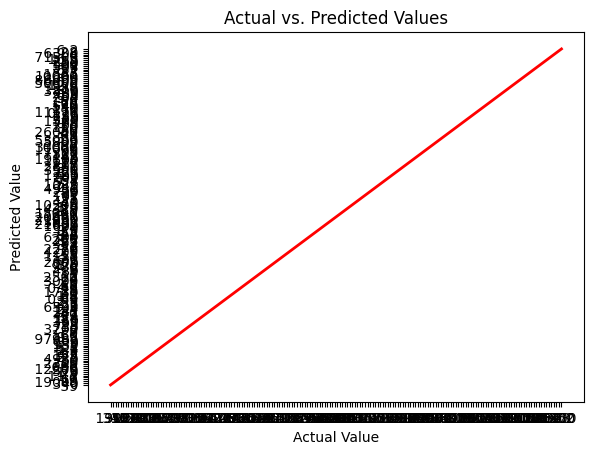

Mean Squared Error: 104616791.89159995
Slope: [0.32361856]
Intercept: 2412.3227755613198
Score: 0.1938724827303926


In [135]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color="blue", label="Predicted")
plt.plot(
    y_test, y_test, color="red", label="Ideal", linewidth=2
)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted Values")
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)
print("Score:", model.score(X_test, y_test))
